In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


### Scaling

In [3]:
from sklearn import preprocessing

#Bringing them in range of 0 to 1
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [4]:
scaled_X =sx.fit_transform(df.drop('price',axis=1))

In [6]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [8]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

### Batch Gradient

In [9]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    
    number_of_features = X.shape[1]
    
    #nitialsing our weights and bias
    w = np.ones(shape=(number_of_features))
    b=0
    
    total_samples = X.shape[0]
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        #y_predicted = w1*area + w2*bedrooms + bias
        
        y_predicted = np.dot(w,scaled_X.T) + b
        
        #caluclating derivatives
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*(np.sum(y_true-y_predicted))
        
        #adjusting w and b
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        #cost
        cost = np.mean(np.square(y_true-y_predicted))
        
        if (i%10==0):
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list
        


w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0]),500)

w,b,cost
    
    

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

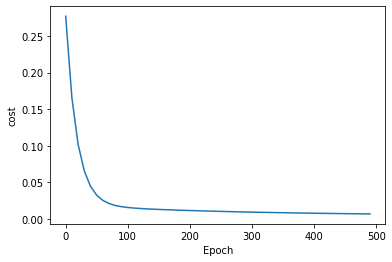

In [11]:
plt.xlabel("Epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

Function for prediction


In [13]:
sy.inverse_transform([[1,0.5,0]])  #1 is max value,0.5 is intermediate and 0 is min

array([[167. ,  99.5,  32. ]])

In [16]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    
    #scaled_price is between 0 to 1
    #reverse transorm it to actual price
    return sy.inverse_transform([[scaled_price]])[0][0]
    

In [17]:
predict(2600,4,w,b)

C:\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [18]:
predict(1000,2,w,b)

C:\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442363

In [19]:
predict(1500,3,w,b)

C:\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

### Stochastic Gradient Descent

In [24]:
import random

#only one computation per epoch
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    #numpy array with 1 row and columns eq to no of features
    number_of_features = X.shape[1]  
    
    w = np.ones(shape=(number_of_features))
    b=0 
    
    total_samples = X.shape[0]
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        #get some random index
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w,sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        #adjusting w and b
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        #cost
        cost = np.square(sample_y-y_predicted)
        
        if (i%100==0):
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list
        
        
         
         
    
    
    
    

In [25]:
w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0]),10000)

w_sgd,b_sgd,cost_sgd

(array([0.7078943 , 0.67525175]), -0.22705617392660368, 0.0053371988198032)

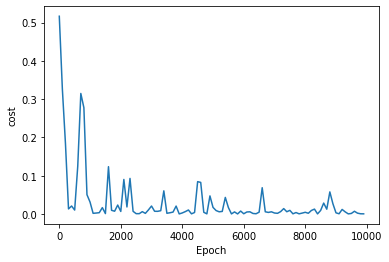

In [26]:
plt.xlabel("Epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [27]:
predict(2600,4,w_sgd,b_sgd)

C:\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


129.03331612985602